In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [2]:
df1 = pd.read_csv("C:/Users/Kartik/Downloads/IRIS.csv")

In [3]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Visualization

<Axes: xlabel='species', ylabel='sepal_length'>

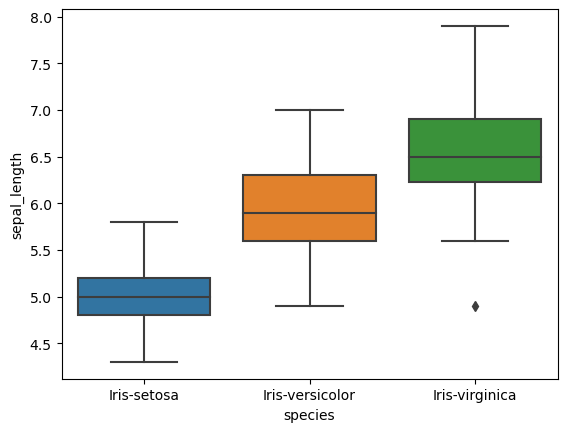

In [4]:
sns.boxplot(df1,x = "species" ,y="sepal_length")

<Axes: xlabel='species', ylabel='sepal_width'>

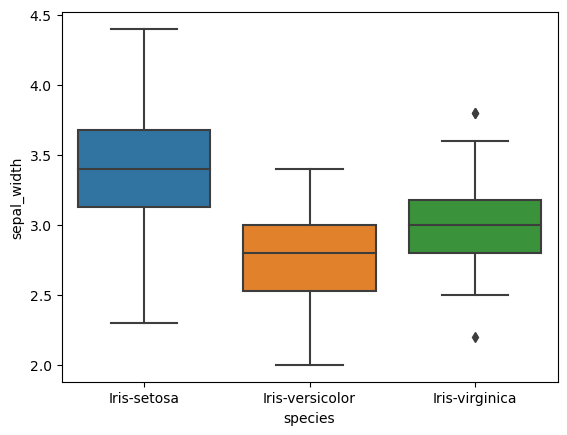

In [5]:
sns.boxplot(df1,x = "species" ,y="sepal_width")

<Axes: xlabel='species', ylabel='petal_length'>

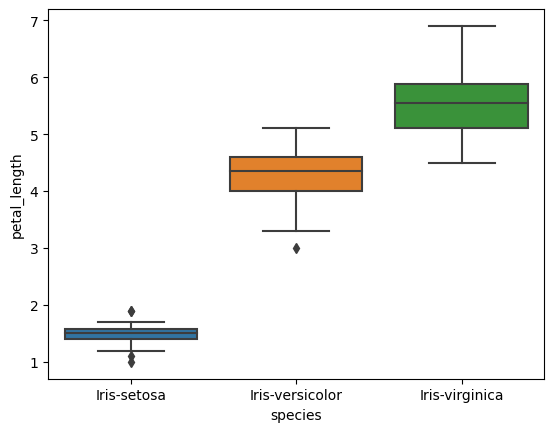

In [6]:
sns.boxplot(df1,x = "species" ,y="petal_length")

<Axes: xlabel='species', ylabel='petal_width'>

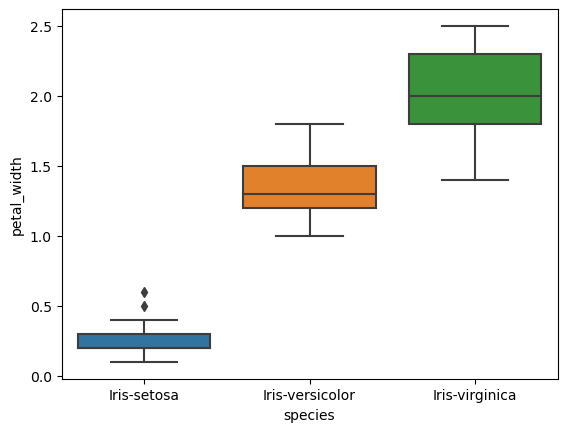

In [7]:
sns.boxplot(df1,x = "species" ,y="petal_width")

<Axes: xlabel='petal_length', ylabel='sepal_length'>

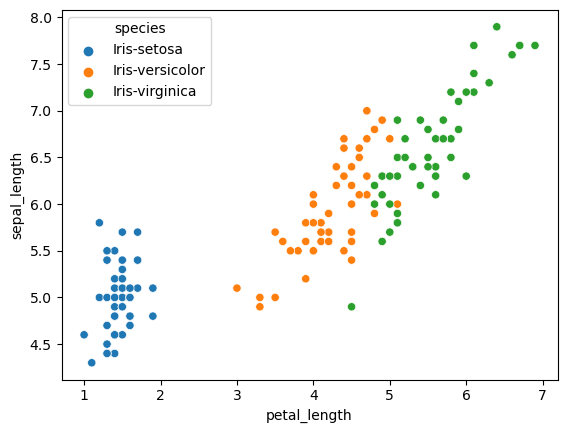

In [8]:
sns.scatterplot(df1,x = "petal_length" ,y="sepal_length" , hue = "species")

<Axes: xlabel='petal_width', ylabel='sepal_width'>

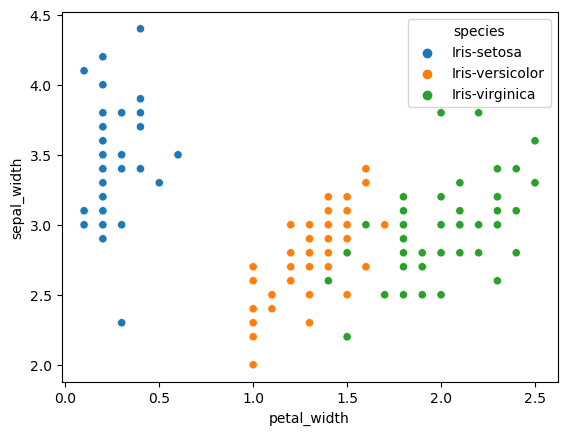

In [9]:
sns.scatterplot(df1,x = "petal_width" ,y="sepal_width" , hue = "species")

## Data Cleaning 

In [10]:
labelencoder = LabelEncoder()
df = df1
df["species"] = labelencoder.fit_transform(df["species"])

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Training

In [12]:
X = df.drop(columns = ["species"])
Y = df["species"]

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y)

In [14]:
model = DecisionTreeClassifier()

In [15]:
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [16]:
ytrainpred = model.predict(Xtrain)

## Testing

In [17]:
ytestpred = model.predict(Xtest)

In [18]:
#Training accuracy
print("Training Accuracy :", accuracy_score(ytrainpred,Ytrain))
#Testing accuracy
print("Testing Accuracy :", accuracy_score(ytestpred,Ytest))

Training Accuracy : 1.0
Testing Accuracy : 0.9736842105263158


## Confusion Matrix

TRAINING DATA


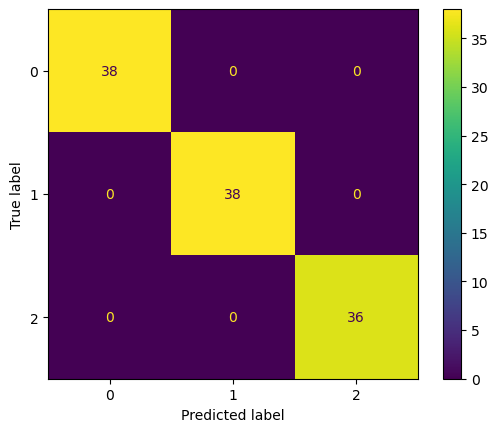

In [19]:
print("TRAINING DATA")
cm = confusion_matrix(ytrainpred,Ytrain)
disp = ConfusionMatrixDisplay( confusion_matrix = cm , display_labels = df1["species"].unique())
disp.plot()
plt.show()

TESTING DATA


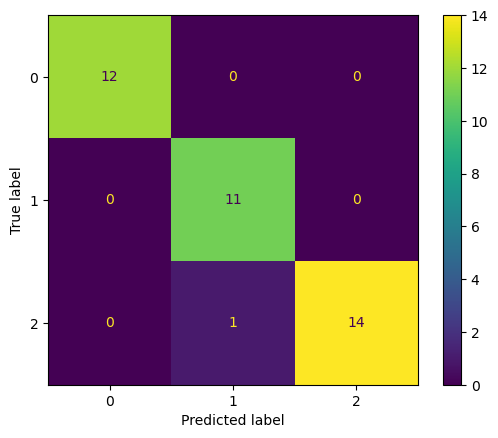

In [20]:
print("TESTING DATA")
cm = confusion_matrix(ytestpred,Ytest)
disp = ConfusionMatrixDisplay( confusion_matrix = cm , display_labels = df1["species"].unique())
disp.plot()
plt.show()